<a href="https://colab.research.google.com/github/reza-latifi/Finding-gradients-using-Maclaurin-Series/blob/main/Finding_gradients_using_Maclaurin_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from numpy.linalg import pinv
import cv2
import matplotlib.pyplot as plt

# Read Data

In [2]:
data = pd.read_csv("https://datahub.io/core/oil-prices/r/brent-daily.csv").Price

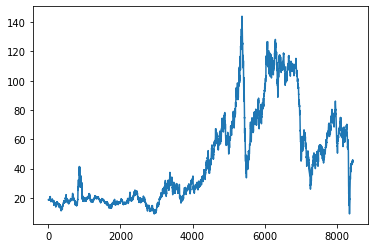

In [3]:
plt.plot(data)
plt.show()

#Calculate gradient 

In [4]:
n=4
grad= []
for j in np.arange(n//2,len(data)-(n//2)):
    # [X][A] = [D]
    d = []
    a = [] # gradients
    x = []
    for i in range(1, (n//2)+1): # if n=4 : i = 1,2
      d.append(data[j+i] - data[j]) ## f(1) - f(0)
      d.append(data[j-i] - data[j]) ## f(-1) - f(0)

    for i in range(1, (n//2)+1):
      row = []
      for mult in range(1, n+1):
          row.append((i)**mult/np.math.factorial(mult))
      a.append(row)

      row = []
      for mult in range(1, n+1):
          row.append((-1*i)**mult/np.math.factorial(mult))
      a.append(row)

    a = np.array(a)
    x = pinv(a.T @ a) @ a.T @ d
    grad.append(x[0]) # Select f′
    a = a.tolist()

In [5]:
a = np.gradient(data[n//2:-1*n//2])
b = grad

# Cosine similarity between Numpy.gradient and our method

In [6]:
np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

0.9901834104325833

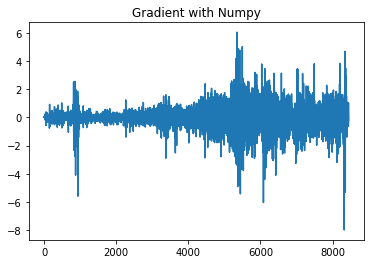

In [7]:
plt.plot(a)
plt.title("Gradient with Numpy")
plt.show()

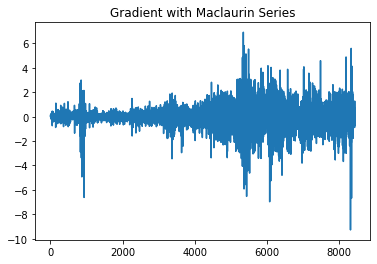

In [8]:
plt.plot(grad)
plt.title("Gradient with Maclaurin Series")
plt.show()